Распознавание 10 предметов на уменьшенных изображениях
(CIFAR10 small images classification dataset)

Нейросеть должна состоять из пяти полносвязных слоёв,
обязательное использование ActivityRegularization, в качестве
оптимизатора использовать RMSprop.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import pandas as pd
from keras.layers import Conv2D
from tensorflow.keras import datasets, layers, utils, models
from tensorflow.keras.models import Sequential
from datetime import datetime

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [2]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
y_train.shape, y_test.shape

((50000,), (10000,))

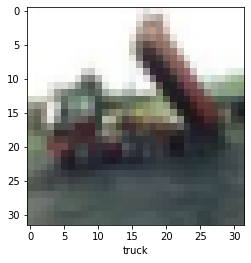

In [4]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def show_plot(img_data, indexes_data, index):
    plt.imshow(img_data[index])
    plt.xlabel(classes[indexes_data[index]])


show_plot(x_train, y_train, 2)

In [5]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

In [6]:
model = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Flatten(input_shape=(128, 8, 8)),
    layers.Dense(128, activation='relu'),
    layers.ActivityRegularization(l1=0.001),
    layers.Dense(10, activation='softmax')
])

# model = Sequential([
#     layers.Flatten(input_shape=(32, 32, 3)),
#     layers.Dense(2048, activation='relu'),
#     layers.Dense(1024, activation='relu'),
#     layers.ActivityRegularization(l1=0.0001),
#     layers.Dense(256, activation='relu'),
#     layers.ActivityRegularization(l1=0.0001),
#     layers.Dense(10, activation='softmax'),
# ])

model.build(input_shape=(None, 32, 32, 1))
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [7]:
epochs = 10
history = model.fit(x=x_train, y=y_train_cat, epochs=epochs, validation_split=0.2)

model.save(f'{datetime.now().strftime("%Y-%m-%d-%H-%M-%S")}_CNN_{epochs}.model')

# hist_df = pd.DataFrame(history.history)
# hist_csv_file = 'history.csv'
# with open(hist_csv_file, mode='w') as f:
#     hist_df.to_csv(f)

Epoch 1/10
1250/1250 [==============================] - 50s 40ms/step - loss: 1.4671 - accuracy: 0.4870 - val_loss: 1.2289 - val_accuracy: 0.5776

In [11]:
# model = models.load_model('2021-11-23-04-15-48_CNN_30.model')
# model = models.load_model('2021-11-23-10-52-59_CNN_10.model')
model = models.load_model('2021-11-23-14-59-00_CNN_10.model')
predict = model.predict(x_test)
predict = np.argmax(predict, axis=1)

print(predict)
print(y_test)

mask = predict == y_test
x_correct = x_test[mask]
x_wrong = x_test[~mask]

print(f'Correct answers: {x_correct.shape[0] / x_test.shape[0]}')
print(f'Wrong answers: {x_wrong.shape[0] / x_test.shape[0]}')

[3 8 4 ... 5 4 7]
[3 8 8 ... 5 1 7]
Correct answers: 0.6975
Wrong answers: 0.3025


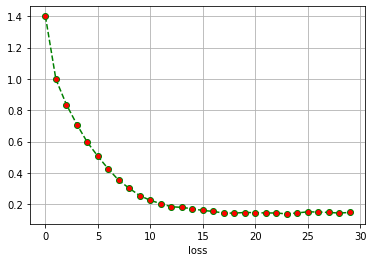

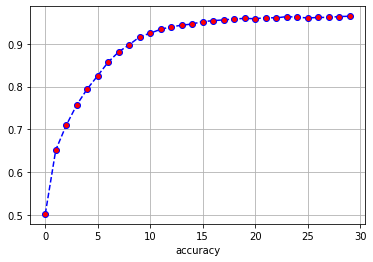

In [12]:
history_df = pd.read_csv('history.csv')

plt.plot(history_df['loss'], color='green', linestyle='dashed', marker='o', markerfacecolor='red')
plt.xlabel('loss')
plt.grid(True)
plt.show()

plt.plot(history_df['accuracy'], color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.xlabel('accuracy')
plt.grid(True)
plt.show()

(1, 32, 32, 3)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 0, "('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')")

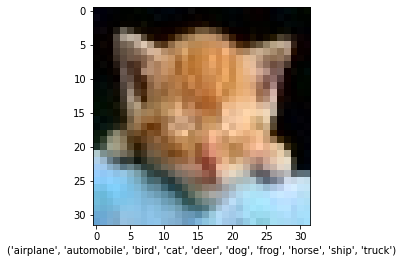

In [13]:
img = image.imread('/home/artem/Desktop/download.jpeg')
img = np.expand_dims(img, axis=0)
print(img.shape)

img_predict = model.predict([img])
print(img_predict)

plt.imshow(img[0])
plt.xlabel(classes)